In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# dataset loading

In [37]:
data=pd.read_csv('car_age_price.csv')

In [38]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


# Basic details of dataset

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [40]:
data.shape

(112, 2)

In [41]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [42]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [43]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [44]:
data['Year'].nunique()

8

In [45]:
corrmatrix = data.corr()

In [46]:
corrmatrix

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


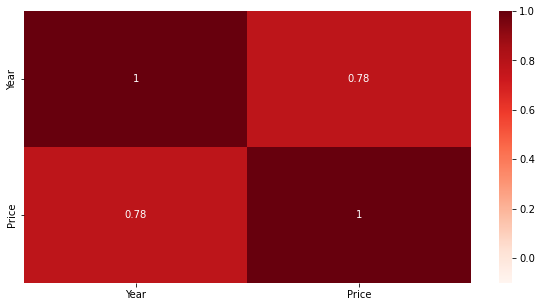

In [47]:
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,vmin=-0.1, vmax= 1.0,annot=True,cmap='Reds')
plt.show()

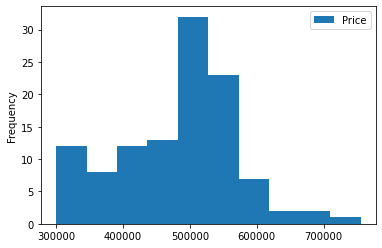

In [48]:
data.plot.hist(x='Year',y='Price')
plt.show()

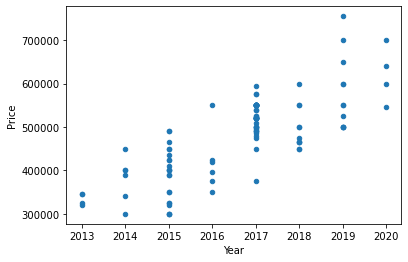

In [49]:
data.plot.scatter(x='Year',y='Price')
plt.show()

In [50]:
data['Year'].nunique()

8

In [51]:
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014], dtype=int64)

In [52]:
X=data.drop('Price',axis=1)
y=data.drop('Year',axis=1)

# Predicting using linear regression

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [54]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [55]:
model1=lr.fit(X_train,y_train)

In [56]:
pred2=model1.predict([[2022]])    
print('Possible Price of a 2022 model second-hand grand i10 for the year 2022 is:',pred2)

Possible Price of a 2022 model second-hand grand i10 for the year 2022 is: [[743601.61594504]]


In [57]:
pred1=model1.predict(X_test)


Finding mean squared error and R squared value

In [58]:
from sklearn.metrics import mean_squared_error,r2_score

In [59]:
print('Mean squared error is:',mean_squared_error(y_test,pred1))
print('R squared error is:',r2_score(y_test,pred1))

Mean squared error is: 4326906256.829671
R squared error is: 0.36759313425902185


In [60]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,pred1)))

RMSE value is: 65779.22359552195


In [61]:
lr.score(X_train,y_train)

0.6389354253755697

In [62]:
lr.score(X_test,y_test)

0.36759313425902185

In [63]:
##Overfitting

# Predicting using Lasso Regression

In [64]:
from sklearn.linear_model import Lasso

In [65]:
lasso=Lasso(alpha=7000)

In [66]:
model3=lasso.fit(X_train,y_train)

In [67]:
y_pred=model3.predict(X_test)

In [68]:
prd = lasso.predict([[2022]]) 
print("Possible Price of a 2022 model second-hand grand i10 for the year 2022 is:", prd)

Possible Price of a 2022 model second-hand grand i10 for the year 2022 is: [727909.90070774]


In [69]:
from sklearn.metrics import mean_squared_error
print('mean_squared_error:',mean_squared_error(y_test,y_pred))
print('the r squared value is',r2_score(y_test,y_pred))

mean_squared_error: 4030522275.2471113
the r squared value is 0.4109116749721715


In [70]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE value is: 63486.39441051217


The mean squared value is comparatively less while using lasso regression. It seems to be performing better.